<a href="https://colab.research.google.com/github/pauarmentaa/Regresion-No-Lineal-y-Regresion-Logistica/blob/main/a%C3%B1o2022_act7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actvidad 7.1 Archivo Gastos y Costos AÑO 2022**

In [ ]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [ ]:
#Cargar archivo csv desde seaborn
df=pd.read_csv("Gastos_costos_2022.csv")
df.head(5)

,Unnamed: 0,FECHA,FOLIO,PROVEEDOR,DESCRIPCION,TIPO_GASTO,IMPORTE,IVA,TOTAL MX
0,4,2022-01-01,280109,BEPENSA LEASING S.A. DE C.V.,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,ARRENDAMIENTO FINANCIERO,5551.98,888.32,6440.3
1,5,2022-01-01,007817297284,"BANCO NACIONAL DE MEXICO, S.A.",Servicios de Facturación,COMISION BANCARIA,0.00,0.00,0.0
2,6,2022-01-01,5595,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,Pago,COMPRAS,0.00,0.00,0.0
3,7,2022-01-01,5614,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,Pago,COMPRAS,0.00,0.00,0.0
4,8,2022-01-01,42862,"AESA ARTICULOS ELECTRICOS, S.A. DE C.V.",Pago,COMPRAS,0.00,0.00,0.0


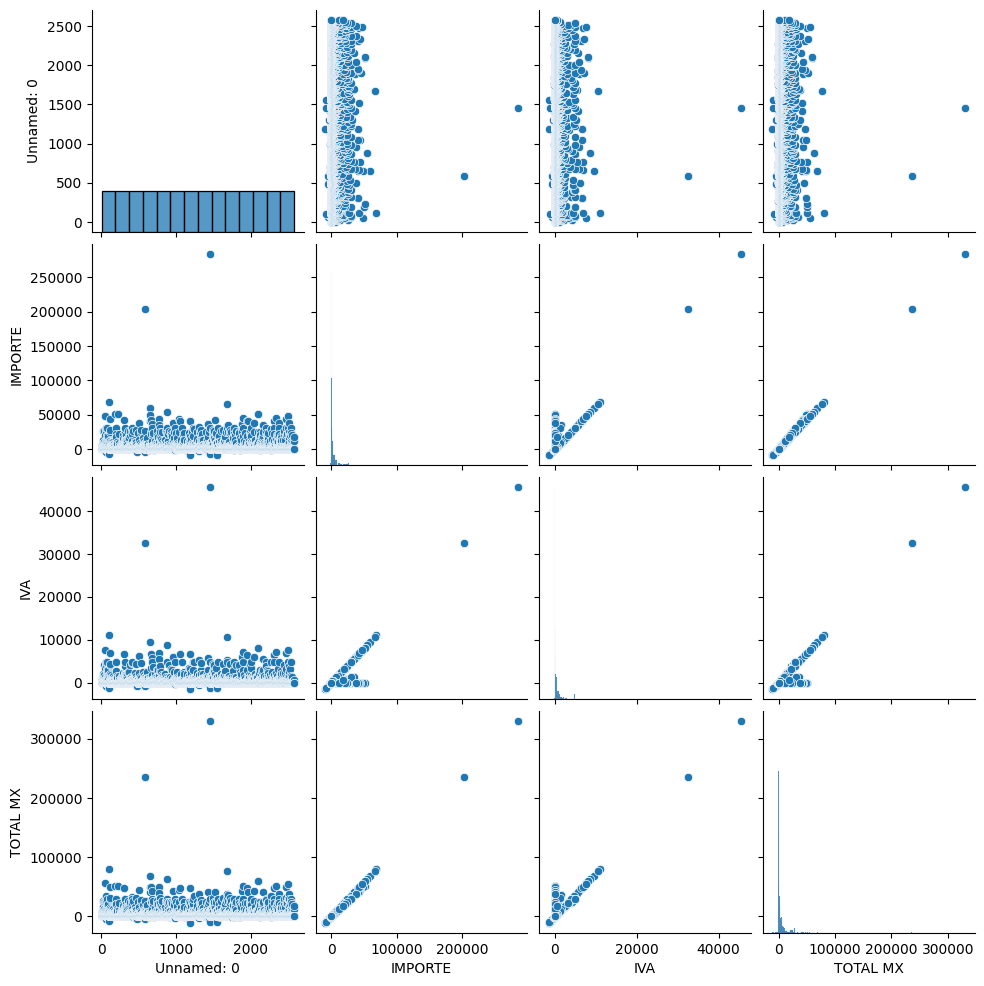

In [ ]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['IVA']]
Var_Dep= df['TOTAL MX']

In [ ]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

**Modelo 1**

In [ ]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df['IVA'], df['TOTAL MX'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([1.56171216e-05, 6.58286021e+00, 1.14196788e+03])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, df['IVA'], df['TOTAL MX'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

,IVA
0,7001.977926
1,1141.967882
2,1141.967882
3,1141.967882
4,1141.967882
...,...
2571,1141.967882
2572,4544.993575
2573,1141.967882
2574,1141.967882


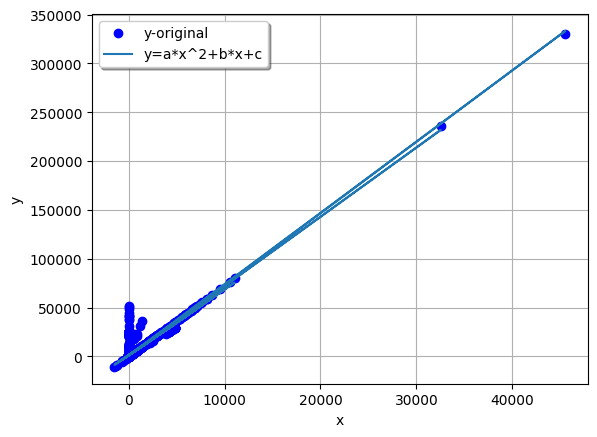

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

0.8397839059464711

**MODELO 2**

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

def func_racional(x, A, B, C):
    return (A * x) / (B * x + C)

In [ ]:
# Ajustamos los parámetros de la función curve_fit
parametros_racional, covs_racional = curve_fit(func_racional, df['IVA'], df['TOTAL MX'])

In [ ]:
# Obtenemos los coeficientes del modelo de regresión no lineal
parametros_racional

array([1.62732983e+03, 2.80726158e-01, 9.67258135e-01])

In [ ]:
# Creamos el modelo de predicción con los parámetros obtenidos
A_racional, B_racional, C_racional = parametros_racional[0], parametros_racional[1], parametros_racional[2]
yfit_racional = func_racional(df['IVA'], A_racional, B_racional, C_racional)

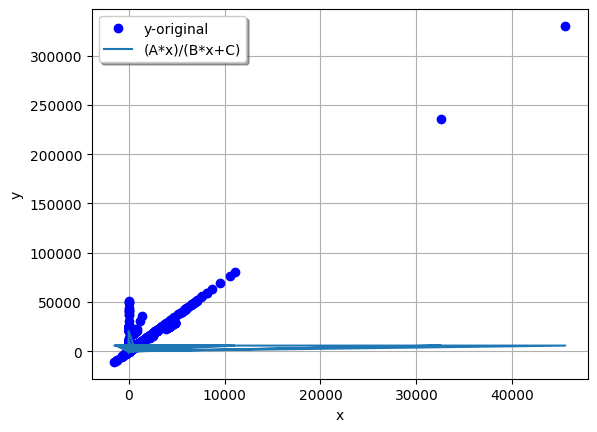

In [ ]:
# Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(df['IVA'], df['TOTAL MX'], 'bo', label="y-original")
plt.plot(df['IVA'], yfit_racional, label="(A*x)/(B*x+C)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
# Calculamos el coeficiente de determinación del modelo
R2 = r2_score(df['TOTAL MX'], yfit_racional)
R2

0.01194599173871247